In [20]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import numpy as np
import seaborn as sbn

Import Data and standardize NaN.


In [21]:
mis_val = ["s"]
reg = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv', na_values = mis_val)

reg

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,na,na
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1.0,6.3,15.0,93.8,7.0,43.8,na,na
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74.0,1.0,11.1,8.0,88.9,2.0,22.2,na,na
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,na,na
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212326,84X717,Icahn Charter School,K-8,Living Environment,2016,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,na,na
212327,84X717,Icahn Charter School,K-8,Living Environment,2016,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,na,na
212328,84X717,Icahn Charter School,K-8,Living Environment,2017,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,na,na
212329,84X717,Icahn Charter School,K-8,Living Environment,2017,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,na,na


Analyze, Organize, Clean if possible... 
Make some subsets to filter out redundancies

In [22]:
reg['Year'].unique()

array([2017, 2015, 2016])

In [23]:
cca15 = reg[((reg['Regents Exam'] == 'Common Core Algebra') & (reg['Year']==2015))] 
cca15

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
8,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2015,49,78.4,1.0,2.0,48.0,98.0,23.0,46.9,48,98
12,01M188,P.S. 188 The Island School,K-8,Common Core Algebra,2015,23,62.9,14.0,60.9,9.0,39.1,0.0,0.0,2,8.7
20,01M292,Orchard Collegiate Academy,High school,Common Core Algebra,2015,12,52.3,11.0,91.7,1.0,8.3,0.0,0.0,0,0
55,01M378,School for Global Leaders,Junior High-Intermediate-Middle,Common Core Algebra,2015,6,80.7,0.0,0.0,6.0,100.0,3.0,50.0,6,100
62,01M448,University Neighborhood High School,High school,Common Core Algebra,2015,105,62.6,52.0,49.5,53.0,50.5,2.0,1.9,30,28.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212223,84X704,KIPP Academy Charter School,K-12 all grades,Common Core Algebra,2015,21,69.9,4.0,19.0,17.0,81.0,0.0,0.0,14,66.7
212224,84X704,KIPP Academy Charter School,K-12 all grades,Common Core Algebra,2015,21,65.0,9.0,42.9,12.0,57.1,0.0,0.0,9,42.9
212308,84X706,Harriet Tubman Charter School,K-8,Common Core Algebra,2015,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,na,na
212318,84X717,Icahn Charter School,K-8,Common Core Algebra,2015,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,na,na


In [24]:
cca15['Mean Score'].mean()

63.16826235093698

In [25]:
cca17 = reg[((reg['Regents Exam'] == 'Common Core Algebra') & (reg['Year']==2017))] 
cca17

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,na,na
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,na,na
10,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2017,51,84.8,0.0,0.0,51.0,100.0,44.0,86.3,50,98
14,01M188,P.S. 188 The Island School,K-8,Common Core Algebra,2017,20,67.4,7.0,35.0,13.0,65.0,1.0,5.0,10,50
22,01M292,Orchard Collegiate Academy,High school,Common Core Algebra,2017,53,67.5,15.0,28.3,38.0,71.7,6.0,11.3,29,54.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212311,84X706,Harriet Tubman Charter School,K-8,Common Core Algebra,2017,15,82.6,0.0,0.0,15.0,100.0,12.0,80.0,15,100
212312,84X706,Harriet Tubman Charter School,K-8,Common Core Algebra,2017,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,na,na
212313,84X706,Harriet Tubman Charter School,K-8,Common Core Algebra,2017,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,na,na
212322,84X717,Icahn Charter School,K-8,Common Core Algebra,2017,6,87.0,0.0,0.0,6.0,100.0,6.0,100.0,6,100


In [26]:
cca17['Mean Score'].mean()

69.96380871533673

In [27]:
reg.shape

(212331, 15)

In [28]:
reg.columns


Index(['School DBN', 'School Name', 'School Level', 'Regents Exam', 'Year',
       'Total Tested', 'Mean Score', 'Number Scoring Below 65',
       'Percent Scoring Below 65', 'Number Scoring 65 or Above',
       'Percent Scoring 65 or Above', 'Number Scoring 80 or Above',
       'Percent Scoring 80 or Above', 'Number Scoring CR',
       'Percent Scoring CR'],
      dtype='object')

In [29]:
reg.dtypes

School DBN                      object
School Name                     object
School Level                    object
Regents Exam                    object
Year                             int64
Total Tested                     int64
Mean Score                     float64
Number Scoring Below 65        float64
Percent Scoring Below 65       float64
Number Scoring 65 or Above     float64
Percent Scoring 65 or Above    float64
Number Scoring 80 or Above     float64
Percent Scoring 80 or Above    float64
Number Scoring CR               object
Percent Scoring CR              object
dtype: object

Change the data types to integers or floats to run stats then impute mean into NaNs...


In [30]:
reg['Total Tested','Mean Score','Number Scoring Below 65','Percent Scoring Below 65','Number Scoring 65 or Above','Percent Scoring 65 or Above','Number Scoring 80 or Above','Percent Scoring 80 or Above','Number Scoring CR','Percent Scoring CR'] = pd.to_numeric

In [31]:
reg.dtypes

School DBN                                                                                                                                                                                                                                 object
School Name                                                                                                                                                                                                                                object
School Level                                                                                                                                                                                                                               object
Regents Exam                                                                                                                                                                                                                               object
Year                            

In [32]:
reg['Mean Score'].mean()


65.99896651569192

Graph out improvement


KeyboardInterrupt: ignored

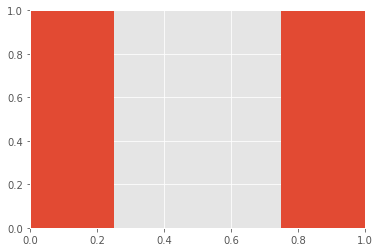

In [33]:
cca15.plot(kind = 'bar', x = 'School Name', y = 'Mean Score')


Filtering out unique school names

In [34]:
sn15 = cca15.drop_duplicates(subset=['School Name'])
sn15

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
8,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2015,49,78.4,1.0,2.0,48.0,98.0,23.0,46.9,48,98
12,01M188,P.S. 188 The Island School,K-8,Common Core Algebra,2015,23,62.9,14.0,60.9,9.0,39.1,0.0,0.0,2,8.7
20,01M292,Orchard Collegiate Academy,High school,Common Core Algebra,2015,12,52.3,11.0,91.7,1.0,8.3,0.0,0.0,0,0
55,01M378,School for Global Leaders,Junior High-Intermediate-Middle,Common Core Algebra,2015,6,80.7,0.0,0.0,6.0,100.0,3.0,50.0,6,100
62,01M448,University Neighborhood High School,High school,Common Core Algebra,2015,105,62.6,52.0,49.5,53.0,50.5,2.0,1.9,30,28.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19290,84X488,The Equality Charter School,Secondary School,Common Core Algebra,2015,106,65.1,31.0,29.2,75.0,70.8,0.0,0.0,33,31.1
19393,84X703,Bronx Preparatory Charter School,Secondary School,Common Core Algebra,2015,88,63.4,47.0,53.4,41.0,46.6,0.0,0.0,21,23.9
19428,84X704,KIPP Academy Charter School,K-12 all grades,Common Core Algebra,2015,42,67.5,13.0,31.0,29.0,69.0,0.0,0.0,23,54.8
19465,84X706,Harriet Tubman Charter School,K-8,Common Core Algebra,2015,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,na,na


In [35]:
sn15.plot(kind = 'bar', x = 'School Name', y = 'Mean Score')

Error in callback <function flush_figures at 0x7fb1f7bc8290> (for post_execute):


KeyboardInterrupt: ignored

In [36]:
cca15 = reg[((reg['Regents Exam'] == 'Common Core Algebra') & (reg['School Level'] == 'High school') & (reg['Year']==2015))] 
cca15

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR,"(Total Tested, Mean Score, Number Scoring Below 65, Percent Scoring Below 65, Number Scoring 65 or Above, Percent Scoring 65 or Above, Number Scoring 80 or Above, Percent Scoring 80 or Above, Number Scoring CR, Percent Scoring CR)"
20,01M292,Orchard Collegiate Academy,High school,Common Core Algebra,2015,12,52.3,11.0,91.7,1.0,8.3,0.0,0.0,0,0,<function to_numeric at 0x7fb1ed8cdb90>
62,01M448,University Neighborhood High School,High school,Common Core Algebra,2015,105,62.6,52.0,49.5,53.0,50.5,2.0,1.9,30,28.6,<function to_numeric at 0x7fb1ed8cdb90>
108,01M458,Forsyth Satellite Academy,High school,Common Core Algebra,2015,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,na,na,<function to_numeric at 0x7fb1ed8cdb90>
130,01M509,Marta Valle High School,High school,Common Core Algebra,2015,41,61.3,25.0,61.0,16.0,39.0,1.0,2.4,6,14.6,<function to_numeric at 0x7fb1ed8cdb90>
162,01M515,Lower East Side Preparatory High School,High school,Common Core Algebra,2015,130,67.3,43.0,33.1,87.0,66.9,16.0,12.3,64,49.2,<function to_numeric at 0x7fb1ed8cdb90>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211977,84X553,New Visions Charter High School for the Humani...,High school,Common Core Algebra,2015,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,na,na,<function to_numeric at 0x7fb1ed8cdb90>
211978,84X553,New Visions Charter High School for the Humani...,High school,Common Core Algebra,2015,52,55.7,42.0,80.8,10.0,19.2,0.0,0.0,2,3.8,<function to_numeric at 0x7fb1ed8cdb90>
211979,84X553,New Visions Charter High School for the Humani...,High school,Common Core Algebra,2015,79,54.7,63.0,79.7,16.0,20.3,0.0,0.0,1,1.3,<function to_numeric at 0x7fb1ed8cdb90>
211980,84X553,New Visions Charter High School for the Humani...,High school,Common Core Algebra,2015,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,na,na,<function to_numeric at 0x7fb1ed8cdb90>


drop currently unwanted data 

In [37]:
cca15.drop(['Number Scoring Below 65','Percent Scoring Below 65','Number Scoring 65 or Above','Percent Scoring 65 or Above','Number Scoring 80 or Above','Percent Scoring 80 or Above','Number Scoring CR','Percent Scoring CR',axis=1,inplace = True])

SyntaxError: ignored

For this assignment I was attempting to find if there was any measurable improvement in the common core algebra regents going from 2015 to 2017. However I ran into my first issue when I tried to go by School Name and I realized I needed to do a lot more filtering before I tried to plot as this was taking too much time and computing power. 
I tried to subset and filter but when I tried to drop columns I ran into my first big wall. Although I'm not able to visualize at the moment, at least I can infer without inserting bias that there is a positive change in the mean from 63 to 69 from 2015 to 2017 respectively. I'll continie to work on this until I can get the visuals to be clear and concise. 